In [1]:
import mysql.connector
from mysql.connector import Error
from db_connect import DB_CONFIG
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


/tmp/ipykernel_16406/621697402.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def connect_to_database():
    global connection, cursor
    try:
        connection = mysql.connector.connect(
            host=DB_CONFIG['host'],
            database=DB_CONFIG['database'],
            user=DB_CONFIG['user'],
            password=DB_CONFIG['password']
        )

        if connection.is_connected():
            print("Successfully connected to the database")
            cursor = connection.cursor()

            cursor.execute("SHOW TABLES")
            tables = cursor.fetchall()
            print("Tables in the database:")
            for table in tables:
                print(table[0])

            return connection

    except Error as e:
        print(f"Error: {e}")

def search_query(query) :
    cursor.execute(query)
    rows = cursor.fetchall()
    data_list = []
    for row in rows :
        data_list.append([*row])
    return data_list

In [3]:
connect_to_database()

Successfully connected to the database
Tables in the database:
auction_price_data


In [21]:
query = """
SELECT
    species,
    DATE_FORMAT(date, '%Y-%m') AS month_year,
    SUM(quantity * average) AS total_amount,
    SUM(quantity) AS total_quantity,
    SUM(quantity * average) / SUM(quantity) AS monthly_weighted_average
FROM
    auction_price_data
WHERE
    species LIKE "(활)넙치" AND
    date BETWEEN '2015-01-01' AND '2023-12-31'
GROUP BY
    species,
    month_year
ORDER BY
    month_year;
"""

In [22]:
df = pd.DataFrame(search_query(query))
df.columns = ['species', 'month_year', 'total', 'quantity', 'average']
df.head()

,species,month_year,total,quantity,average
0,(활)넙치,2015-01,1.054865e+09,89440.899483,11793.990446
1,(활)넙치,2015-02,1.114293e+09,94957.660114,11734.630021
2,(활)넙치,2015-03,9.884749e+08,86348.160455,11447.550309
3,(활)넙치,2015-04,8.441399e+08,79085.100647,10673.817575
4,(활)넙치,2015-05,1.172994e+09,149409.249667,7850.876874


In [23]:
average_prices = df.groupby('month_year')['average'].mean().reset_index()
average_prices.head()

,month_year,average
0,2015-01,11793.990446
1,2015-02,11734.630021
2,2015-03,11447.550309
3,2015-04,10673.817575
4,2015-05,7850.876874


In [ ]:
# df.columns = ['species', 'origin', 'size', 'packaging', 'quantity', 'highest', 'lowest', 'average', 'date']

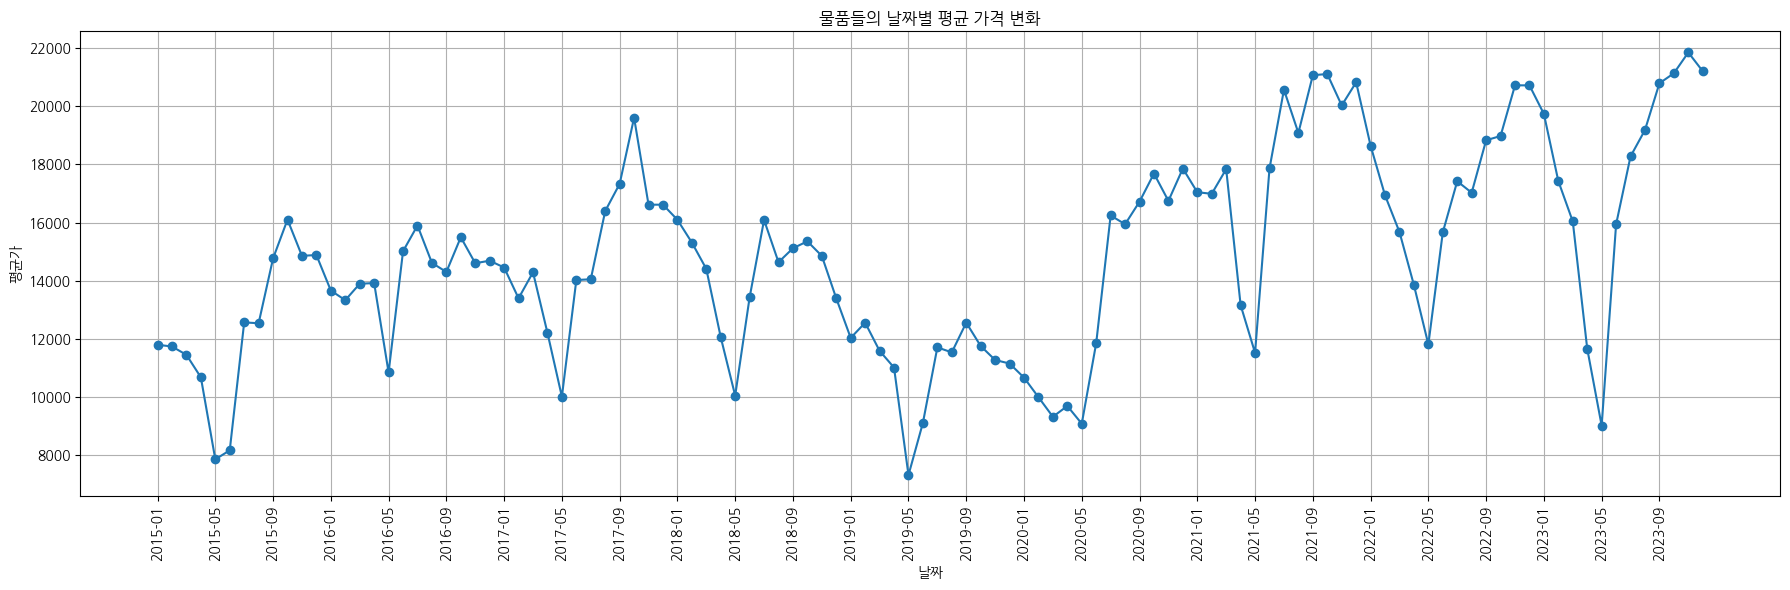

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(average_prices['month_year'], average_prices['average'], marker='o')
plt.title('물품들의 날짜별 평균 가격 변화')
plt.xlabel('날짜')
plt.ylabel('평균가')
plt.grid(True)
xticks = average_prices['month_year'][::4]
plt.xticks(xticks, rotation=90)
plt.tight_layout()
plt.show()

In [61]:
if connection.is_connected():
    connection.close()
    print("MySQL connection is closed")

MySQL connection is closed
